In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
col=['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20', 'turnover', 'code',
       'close_range', 'volume_range', 'close15', 'close_std15',
       'close_range15', 'close_range_std15', 'volume15', 'volume_std15',
       'volume_range15', 'volume_range_std15', 'close30', 'close_std30',
       'close_range30', 'close_range_std30', 'volume30', 'volume_std30',
       'volume_range30', 'volume_range_std30', 'close60', 'close_std60',
       'close_range60', 'close_range_std60', 'volume60', 'volume_std60',
       'volume_range60', 'volume_range_std60', 'close90', 'close_std90',
       'close_range90', 'close_range_std90', 'volume90', 'volume_std90',
       'volume_range90', 'volume_range_std90', 'close120', 'close_std120',
       'close_range120', 'close_range_std120', 'volume120', 'volume_std120',
       'volume_range120', 'volume_range_std120', 'std20', 'boll_up',
       'boll_down', 'boll_range', 'boll_range_p', 'boll_change',
       'boll_range_p20', 'macd', 'isOK_5', 'change_5', 'isOK_10', 'change_10',
       'isOK_15', 'change_15', 'isOK_30', 'change_30', 'rsi',
       'close_gradient5', 'close_gradient10', 'close_gradient15',
       'close_gradient30']

In [7]:
data=pd.read_csv('data.csv',names=col)

In [5]:
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,change_10,isOK_15,change_15,isOK_30,change_30,rsi,close_gradient5,close_gradient10,close_gradient15,close_gradient30
count,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,...,1201756.000000,1201756,1201756.000000,1201756,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000,1201756.000000
mean,16.853827,17.301517,16.900028,16.467486,239548.902163,0.017759,0.174863,16.890456,16.878154,16.853541,...,0.015054,0.238632,0.022462,0.347056,0.045853,53.510214,0.491265,0.474391,0.495031,0.591915
std,13.913981,14.327813,13.953428,13.551857,613996.910788,0.882119,3.667651,13.925136,13.892279,13.824495,...,0.136132,0.426248,0.166739,0.476034,0.244622,16.754531,50.834864,36.578215,29.662294,20.234245
min,1.520000,1.560000,1.550000,1.520000,1.000000,-23.090000,-10.110000,1.528000,1.529000,1.534000,...,-0.828324,False,-0.835954,False,-0.855188,0.000000,-3212.800000,-1713.200000,-1221.466667,-627.233333
25%,8.650000,8.860000,8.680000,8.480000,50634.085000,-0.190000,-1.430000,8.676000,8.673000,8.671000,...,-0.041912,0,-0.048688,0,-0.072102,41.494553,-8.200000,-5.400000,-4.200000,-3.233333
50%,13.190000,13.500000,13.220000,12.900000,106799.505000,0.020000,0.190000,13.222000,13.215000,13.204000,...,0.014648,0,0.020863,0,0.036765,54.371102,1.400000,1.500000,1.400000,1.200000
75%,20.270000,20.830000,20.320000,19.810000,230855.705000,0.240000,1.850000,20.318000,20.316250,20.293000,...,0.074011,0,0.095144,1,0.153174,65.841584,12.200000,9.300000,7.866667,6.066667
max,337.700000,340.000000,337.760000,334.020000,51354664.000000,23.400000,10.230000,333.522000,330.434000,326.597000,...,1.635545,True,2.695024,True,8.217949,99.944465,1470.000000,1279.600000,1104.133333,646.933333


In [15]:
import seaborn as sns

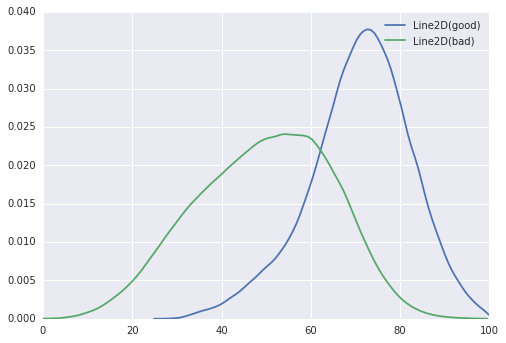

In [17]:
d1=data[data.isOK_10>0]['rsi']
d2=data[data.isOK_10<1]['rsi']
k1=stats.kde.gaussian_kde(d1)
k2=stats.kde.gaussian_kde(d2)
space1=np.linspace(np.min(d1),np.max(d1),100)
space2=np.linspace(np.min(d2),np.max(d2),100)
good, =plt.plot(space1,k1(space1),label='good')
bad, =plt.plot(space2,k2(space2),label='bad')
plt.legend([good, bad])

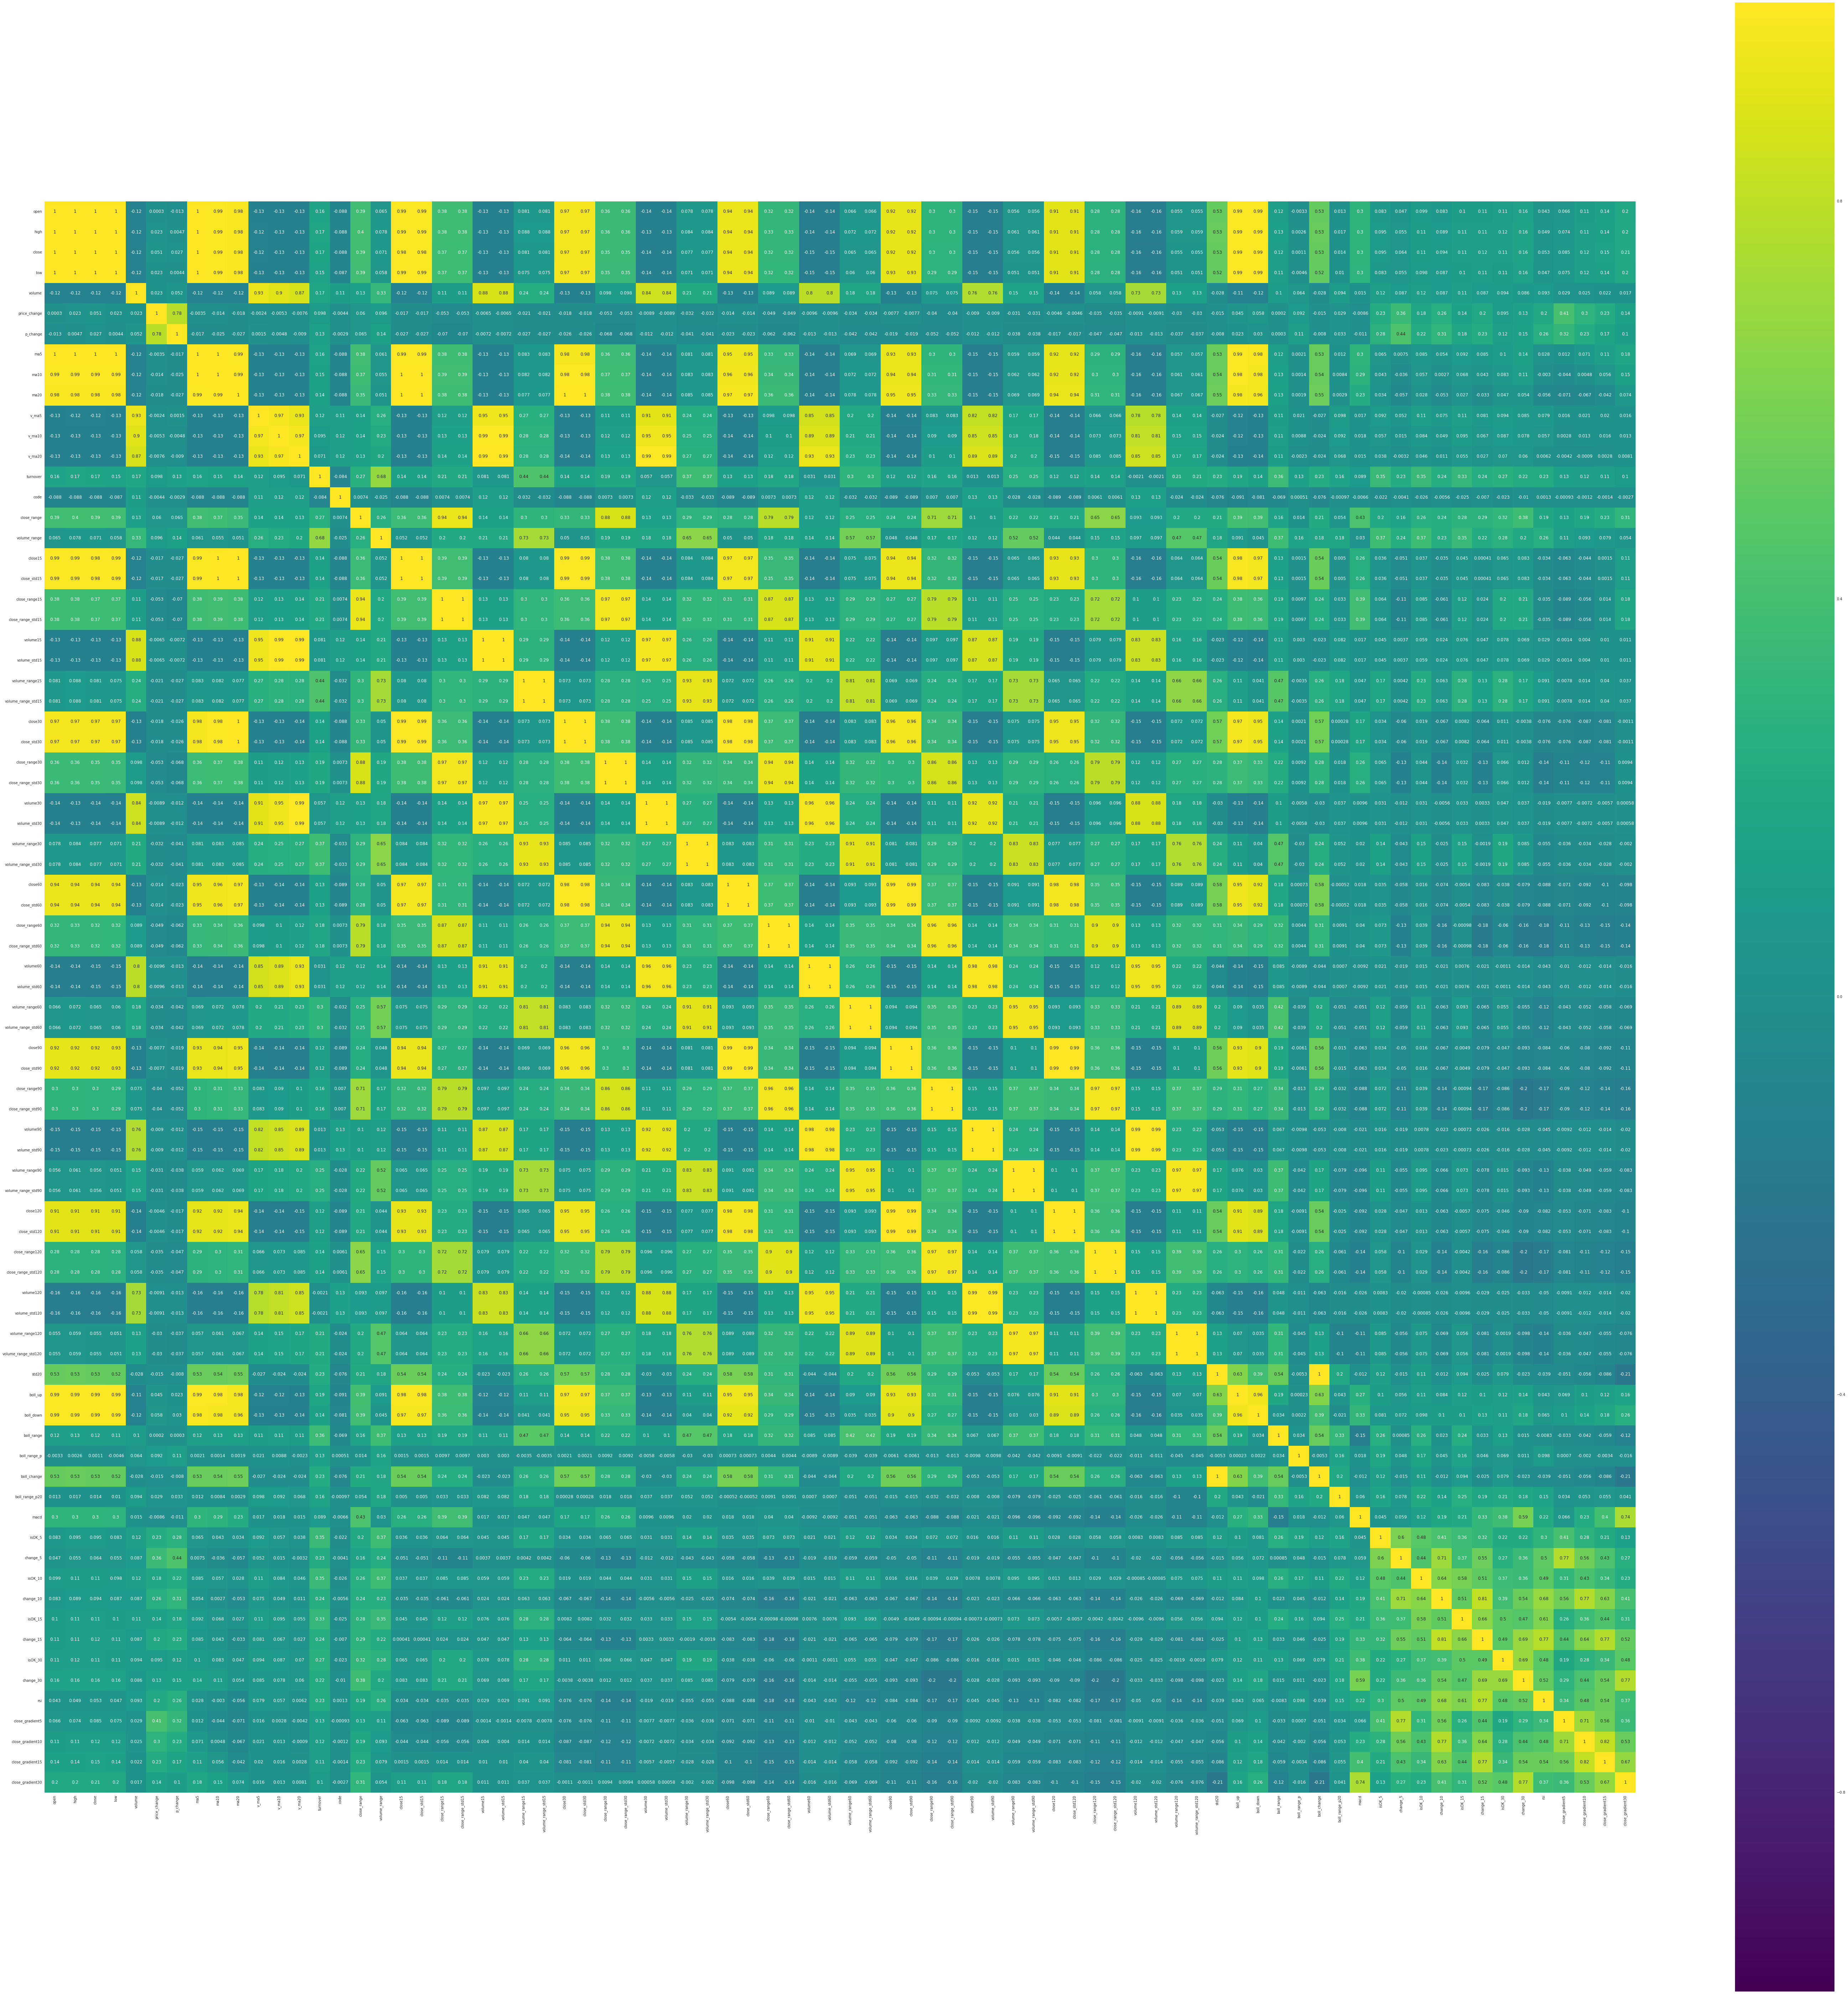

In [18]:
correlation=data.corr()
plt.figure(figsize=(100,100))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='viridis')

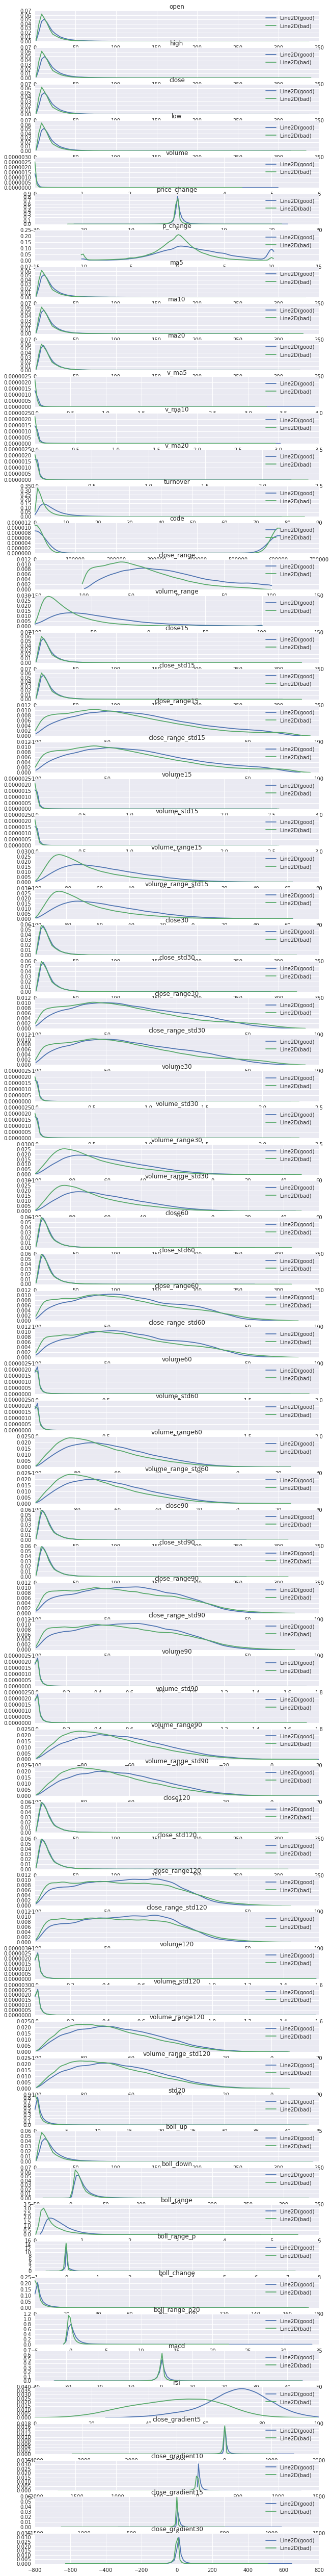

In [21]:
good=data[data.isOK_10>0]
bad=data[data.isOK_10<1]
long=len(col)
plt_count=1
plt.figure(figsize=(10,100))
cols=['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20', 'turnover', 'code',
       'close_range', 'volume_range', 'close15', 'close_std15',
       'close_range15', 'close_range_std15', 'volume15', 'volume_std15',
       'volume_range15', 'volume_range_std15', 'close30', 'close_std30',
       'close_range30', 'close_range_std30', 'volume30', 'volume_std30',
       'volume_range30', 'volume_range_std30', 'close60', 'close_std60',
       'close_range60', 'close_range_std60', 'volume60', 'volume_std60',
       'volume_range60', 'volume_range_std60', 'close90', 'close_std90',
       'close_range90', 'close_range_std90', 'volume90', 'volume_std90',
       'volume_range90', 'volume_range_std90', 'close120', 'close_std120',
       'close_range120', 'close_range_std120', 'volume120', 'volume_std120',
       'volume_range120', 'volume_range_std120', 'std20', 'boll_up',
       'boll_down', 'boll_range', 'boll_range_p', 'boll_change',
       'boll_range_p20', 'macd', 'rsi',
       'close_gradient5', 'close_gradient10', 'close_gradient15',
       'close_gradient30']
for i in cols:
    d1=good[i]
    d2=bad[i]
    k1=stats.kde.gaussian_kde(d1)
    k2=stats.kde.gaussian_kde(d2)
    space1=np.linspace(np.min(d1),np.max(d1),100)
    space2=np.linspace(np.min(d2),np.max(d2),100)
    plt.subplot(long,1,plt_count)
    plt_count +=1
    goods, =plt.plot(space1,k1(space1),label='good')
    bads, =plt.plot(space2,k2(space2),label='bad')
    plt.title(i)
    plt.legend([goods, bads])